# Random Forest Classifier

based on this video: https://www.youtube.com/watch?v=0GrciaGYzV0 

For this random forest classifier, I followed the methods from in the video. He used a different method than we have seen in classes and I wanted to try this one out. The movie is 9 years old though so probably some of the things I used in this nodebook are outdated, but nevertheless it has an accuracy of 90%.

## Imports

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

Create an X and y dataset. X are the features and y is the target.

In [ ]:
X = pd.read_csv("../titanic_correct.csv")
y = X.pop("Survived")

Describe the features.

In [3]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We fill the missing values in Age in with the mean. 

In [4]:
X["Age"].fillna(X.Age.mean(), inplace=True)
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Next, we start by looking at the numeric values.

In [5]:
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


Train the model on the numeric variables.

In [ ]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42) #n_estimators = number of decision trees. oob = out of bag: samples that are not used to train a specific tree. OOB error is the average error for these out-of-bag samples
model.fit(X[numeric_variables], y)

RandomForestClassifier(oob_score=True, random_state=42)

In [7]:
model.oob_score_

0.712682379349046

Calculate the ROC-AUC score.

In [8]:
y_oob = model.oob_decision_function_[:, 1] 
print("c-stat/roc-auc score: ", roc_auc_score(y, y_oob))

c-stat/roc-auc score:  0.7551822026225247


We become a roc-auc score of 76%.

In [9]:
y_oob

array([0.44444444, 0.75862069, 0.20930233, 0.5       , 0.3       ,
       0.41463415, 0.58823529, 0.20588235, 0.61111111, 0.63414634,
       0.72222222, 0.26470588, 0.29032258, 0.575     , 0.80645161,
       0.3125    , 0.11111111, 0.64285714, 0.36956522, 0.3030303 ,
       0.77142857, 0.64102564, 0.17948718, 0.5       , 0.16666667,
       0.02564103, 0.93181818, 0.74285714, 0.5625    , 0.31578947,
       0.52631579, 0.47368421, 0.88636364, 0.55882353, 0.84615385,
       0.5       , 0.56666667, 0.075     , 0.15789474, 0.40425532,
       0.2       , 0.51111111, 0.14285714, 0.9375    , 0.36363636,
       0.09375   , 0.55882353, 0.59459459, 0.3255814 , 0.32258065,
       0.05      , 0.75      , 0.36111111, 0.48387097, 0.18181818,
       0.2       , 0.53846154, 0.47368421, 0.87878788, 0.10526316,
       0.35714286, 0.45714286, 0.76923077, 0.16666667, 0.47619048,
       0.34375   , 0.23684211, 0.23809524, 0.12903226, 0.13157895,
       0.86111111, 0.15789474, 0.2972973 , 0.28205128, 0.39024

Now, we are going to look at the categorical values.

In [10]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML (X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [11]:
describe_categorical(X)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


We drop the name, ticket and passengerID because these aren't very usefull.

In [12]:
X.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

For the values missing from Cabin, we put ‘None’.

In [13]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
    
X["Cabin"] = X.Cabin.apply(clean_cabin)

In [14]:
X.Cabin

0      None
1         C
2      None
3         C
4      None
       ... 
886    None
887       B
888    None
889       C
890    None
Name: Cabin, Length: 891, dtype: object

Next, we process the categorical variables. Preparing them by handling missing values and converting them into numerical form using one-hot encoding.

In [15]:
categorical_variables = ['Sex', 'Cabin', 'Embarked']

for variable in categorical_variables:
    X[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [16]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
1,1,38.000000,1,0,71.2833,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
2,3,26.000000,0,0,7.9250,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,1,35.000000,1,0,53.1000,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4,3,35.000000,0,0,8.0500,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
887,1,19.000000,0,0,30.0000,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
888,3,29.699118,1,2,23.4500,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
889,1,26.000000,0,0,30.0000,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False


Next, we train the model again.

In [ ]:
model = RandomForestClassifier(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X,y)
print("ROC-AUC score: ", roc_auc_score(y, model.oob_decision_function_[:, 1]))

ROC AUC score:  0.8616277335719382


Now, including the categorical data, we arrive at an ROC-AUC score of 86%.

## Variable importance measures

In this part, we will look at which features are most important.

In [23]:
model.feature_importances_

array([6.87750243e-02, 2.42365672e-01, 4.75931587e-02, 3.81037467e-02,
       2.26719132e-01, 1.42455298e-01, 1.29163142e-01, 3.12468689e-03,
       7.10846464e-03, 6.52347427e-03, 6.52026183e-03, 9.75728522e-03,
       2.19673000e-03, 1.40178795e-03, 3.41299082e-02, 3.37554412e-04,
       1.26315194e-02, 6.58198567e-05, 7.10852300e-03, 1.39188097e-02])

plot the features based on importance.

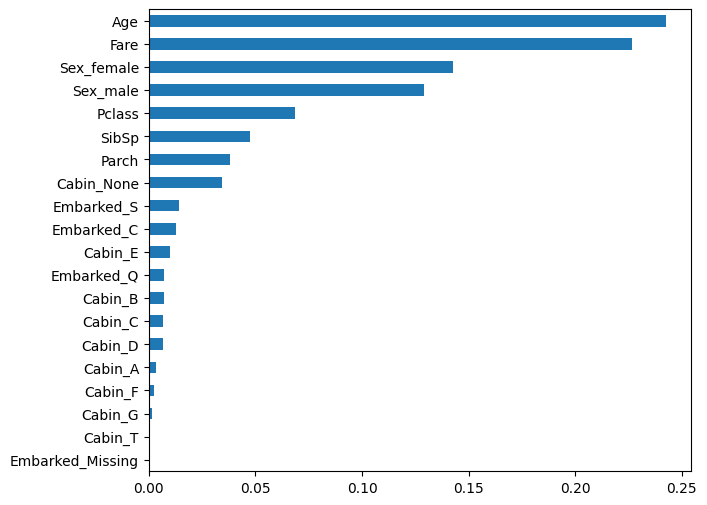

In [24]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=True)
feature_importances.plot(kind="barh", figsize=(7,6));

We can see that Age and fare are important features. but in this chart, the features are split up. We will fix this.

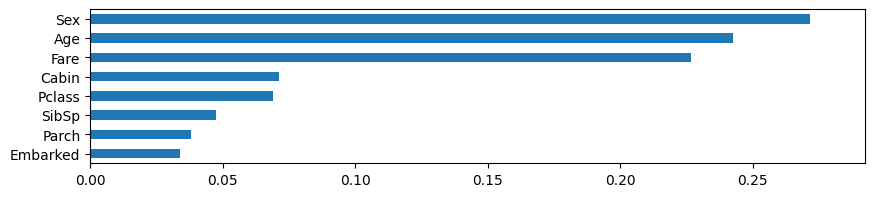

In [25]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    if autoscale:
        x_scale = model.feature_importances_.max() + headroom
    else:
        x_scale = 1

    feature_dict=dict(zip(feature_names, model.feature_importances_))

    if summarized_columns:
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i)

            keys_to_remove = [i for i in feature_dict.keys() if col_name in i]
            for i in keys_to_remove:
                feature_dict.pop(i)
            feature_dict[col_name] = sum_value

    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results = results.sort_values(ascending=True)
    results.plot(kind="barh", figsize=(width, len(results)/4), xlim=(0, x_scale))

graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)

This chart shows that sex, age and fare are the most important features.

## Parameter tests

it part, we are going to look for the best parameter settings.

### n_jobs

In [26]:
%%timeit
model = RandomForestClassifier(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X,y)

2.1 s ± 23.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%%timeit
model = RandomForestClassifier(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X,y)

1.8 s ± 18.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The -1 setting gives the fastest time per loop.

### n_estimators

30 trees
ROC-AUC score:  0.8553909820087561
 
50 trees
ROC-AUC score:  0.858669137932871
 
100 trees
ROC-AUC score:  0.8616277335719382
 
200 trees
ROC-AUC score:  0.8622988101705388
 
1000 trees
ROC-AUC score:  0.8633480331064455
 
2000 trees
ROC-AUC score:  0.8637634614770077
 
3000 trees
ROC-AUC score:  0.8634758572204646
 


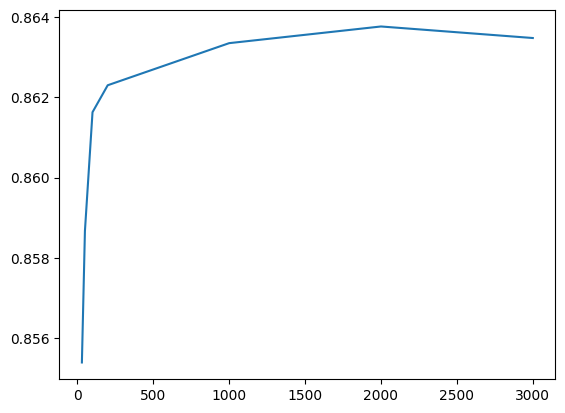

In [53]:
results = []
n_estimator_options = [30, 50, 100, 200, 1000, 2000, 3000]

for trees in n_estimator_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print(trees, "trees")
    roc = roc_auc_score(y, model.oob_decision_function_[:, 1])
    print("ROC-AUC score: ", roc)
    results.append(roc)
    print(" ")

pd.Series(results, n_estimator_options).plot();

Among 2000 estimators, the ROC-AUC score is the highest.

### max_features

None option
ROC-AUC score:  0.8641336188071879

sqrt option
ROC-AUC score:  0.8633480331064455

log2 option
ROC-AUC score:  0.8633480331064455

0.9 option
ROC-AUC score:  0.8635823773154806

0.2 option
ROC-AUC score:  0.8633480331064455



<Axes: >

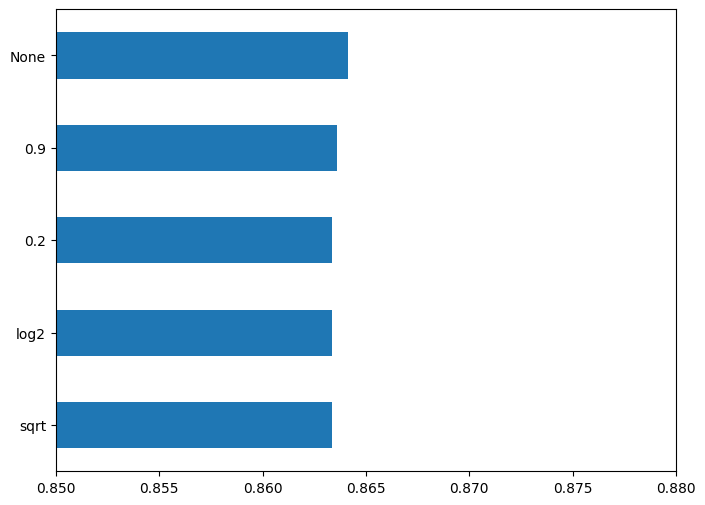

In [54]:
results = []
max_features_options = [None, "sqrt", "log2", 0.9, 0.2] # "auto" stond op de eeste plaats

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print( max_features, "option")
    roc = roc_auc_score(y, model.oob_decision_function_[:, 1])
    print("ROC-AUC score: ", roc)
    results.append(roc)
    print("")



results_series = pd.Series(results, index=max_features_options)
results_series = results_series.sort_values(ascending=True)
results_series.plot(kind="barh", xlim=(0.85, 0.88), figsize=(8, 6))

With max_features=None, the ROC-AUC score is the highest.

### min_samples_leaf

1 min samples
ROC-AUC score:  0.8641336188071879

2 min samples
ROC-AUC score:  0.8697099457812716

3 min samples
ROC-AUC score:  0.8715607324321735

4 min samples
ROC-AUC score:  0.8734674421329585

5 min samples
ROC-AUC score:  0.8742423758241993

6 min samples
ROC-AUC score:  0.8740240096294166

7 min samples
ROC-AUC score:  0.8732677169548035

8 min samples
ROC-AUC score:  0.8718296956720885

9 min samples
ROC-AUC score:  0.8692625613822048

10 min samples
ROC-AUC score:  0.8674250897431801



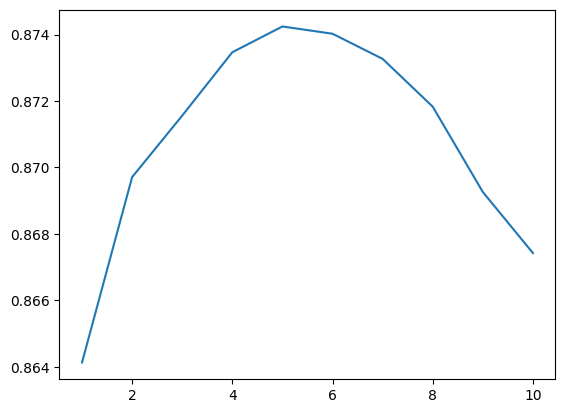

In [55]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=1000,
    oob_score=True, n_jobs=-1, random_state=42, max_features=None, min_samples_leaf=min_samples)

    model.fit(X,y)
    print(min_samples, "min samples")
    roc = roc_auc_score(y, model.oob_decision_function_[:, 1])
    print("ROC-AUC score: ", roc)
    results.append(roc)
    print("")

pd.Series(results, min_samples_leaf_options).plot();

A min_samples_leaf of 5 gives the highest ROC-AUC score.

### Final model

Combine the best parameter options in the model. (I left the n_stimators on 1000 because this gives me the best result. It also had a big impact on the other parameters.)

In [ ]:
model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=None, min_samples_leaf=5) #min_sample_leaf defines the minimum number of samples required to be in a leaf node of a decision tree.
model.fit(X,y)
roc = roc_auc_score(y, model.oob_decision_function_[:, 1])
print("ROC-AUC score:", roc)

ROC-AUC score: 0.8742423758241993


Now that we have applied the best parameter settings to the model, we obtain an ROC-AUC score of 87%.

# Predicting

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

Next we split the dataset into X_train, X_test, y_train, y_test. We train the model and predict on the y_test.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=None, min_samples_leaf=5)

model.fit(X,y)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.888268156424581


We become a accuracy of 89%.

Next, we plot the ROC curve. 

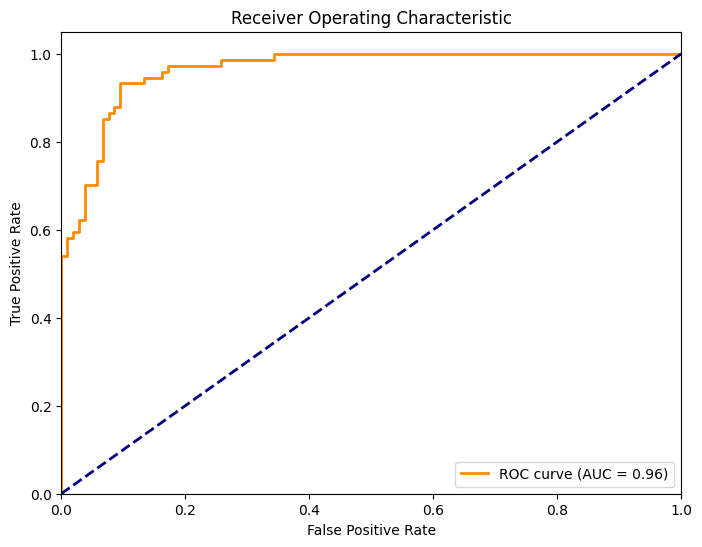

In [62]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive class)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

The ROC curve has a AUC of 96%. this is a very high score!

Now we also plot the confusion matrix.

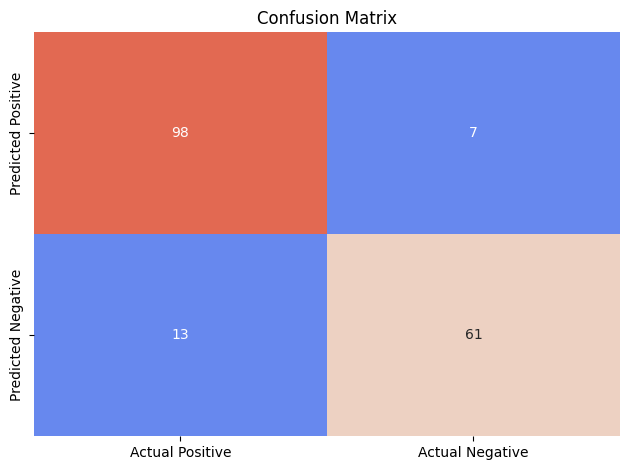

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
df_confusion = pd.DataFrame(matrix, index=['Predicted Positive','Predicted Negative'],columns=['Actual Positive','Actual Negative'])
colormap = sns.color_palette("coolwarm")
sns.heatmap(df_confusion, annot=True, cbar=None, cmap=colormap)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In the confusion matrix, we see that it predicted only 20 wrong out of 179 values!

To conclude, we calculate some performance metrics.

In [65]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
Sensitivity  = float(TP)/(TP+FN)*100
Specificity  = float(TN)/(TN+FP)*100
Precision = float(TP)/(TP+FP)*100
NPV = float(TN)/(TN+FN)*100
FPR = float(FP)/(FP+TN)*100
FNR = float(FN)/(TP+FN)*100
FDR = float(FP)/(TP+FP)*100
ACC = float(TP+TN)/(TP+FP+FN+TN)*100
print(f"True Negative (TN) : {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP) : {TP}")
print(f"Sensitivity or TPR: {round(Sensitivity)}%")    
print(f"Specificity or TNR: {round(Specificity)}%") 
print(f"Precision: {round(Precision)}%")   
print(f"Negative Predictive Value: {round(NPV)}%")  
print( f"False Positive Rate: {round(FPR)}%") 
print(f"False Negative Rate: {round(FNR)}%")  
print(f"False Discovery Rate: {round(FDR)}%" )
print(f"Accuracy: {round(ACC)}%")

True Negative (TN) : 98
False Positive (FP): 7
False Negative (FN): 13
True Positive (TP) : 61
Sensitivity or TPR: 82%
Specificity or TNR: 93%
Precision: 90%
Negative Predictive Value: 88%
False Positive Rate: 7%
False Negative Rate: 18%
False Discovery Rate: 10%
Accuracy: 89%


# Conclusion

This is a very good model! It has a precision of 90% and an accuracy of 89%!